In [50]:
%matplotlib inline
import pylab as plt
import numpy as np
from astropy.modeling import models, fitting
from scipy.stats import binned_statistic

In [127]:
l = np.linspace(600-0.3,600+0.3,1000000)

In [25]:
def airy(e,n_0,r1,r2,lam,th):
    delt = 2*np.pi/lam * 2 * n_0 * e *n.cos(th) 
    tr = 1/((1-np.sqrt(r1*r2))**2+4*np.sqrt(r1*r2)*np.sin(delt)**2)
    return tr/tr.max()

# Main Calibration FP

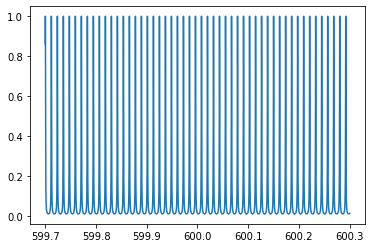

In [76]:
plt.plot(l,airy(7.6*1e6,1,.82,.82,l,0))

(599.7, 599.72)

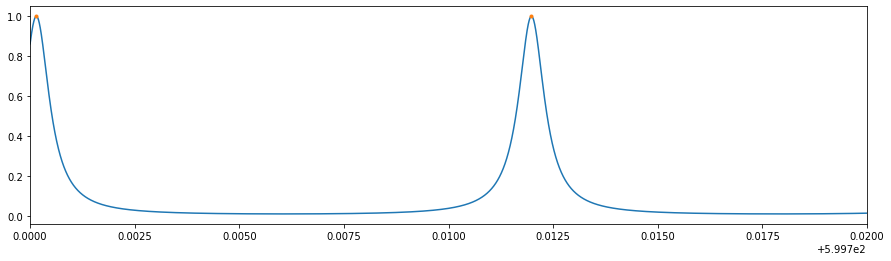

In [128]:
k0 = int(4/l[0]*1*7.6e6)
l0 = 4/k0*1*7.6e6
kk = np.arange(51)
lp = 4/(k0-kk)*1*7.6e6
plt.figure(figsize=(15,4))
plt.plot(l,airy(7.6*1e6,1,.82,.82,l,0))
plt.plot(lp,np.ones(lp.shape),".")
plt.xlim(599.7,599.72)

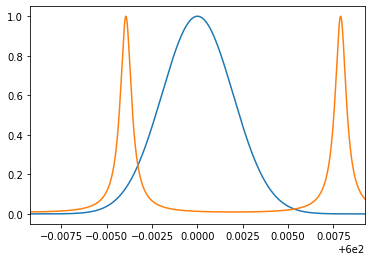

In [129]:
# Modeling the Spectro PSF
# FWHM = 2 * stddev * np.sqrt(2 * np.log(2))
psf=models.Gaussian1D(amplitude = 1,mean = 600, stddev = (600/130000)/2/np.sqrt(2 * np.log(2) ))
ll = np.linspace(600-600/130000,600+600/130000,100)
plt.plot(l,psf(l))
plt.plot(l,airy(7.6*1e6,1,.82,.82,l,0))
plt.xlim(600-2*600/130000,600+2*600/130000)

psf_kernel = psf(l)[(l>600-2*600/130000)&(l<600+2*600/130000)]


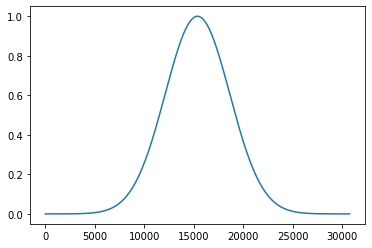

In [130]:
plt.plot(psf_kernel)

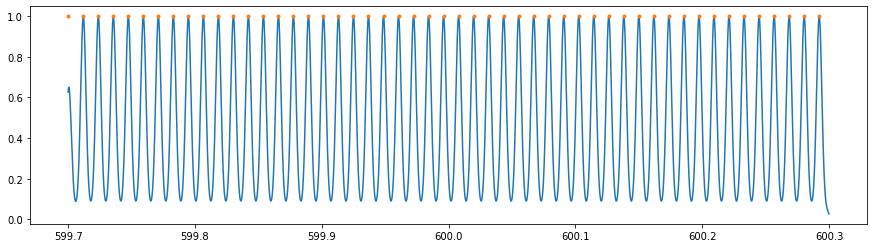

In [131]:
# Convolution of the the spectrum
fpt = airy(7.6*1e6,1,.82,.82,l,0)
plt.figure(figsize=(15,4))
spc = np.convolve(fpt,psf_kernel,mode="same")
plt.plot(l,spc/spc.max())
plt.plot(lp,np.ones(lp.shape),".")

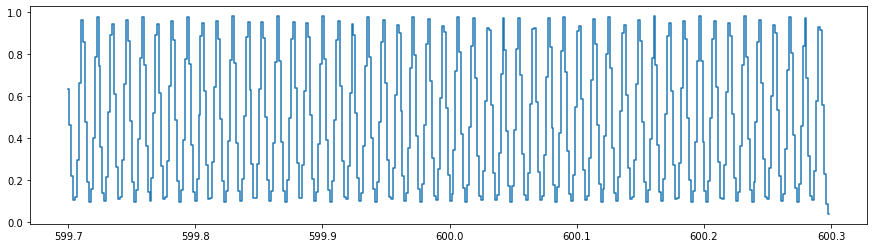

In [132]:
# Discretization of the spectrum
nb =int(l.ptp()/ (600/130000/3))
spcd = binned_statistic(l,spc/spc.max(),"mean",nb)
plt.figure(figsize=(15,4))
cb = 0.5*(spcd.bin_edges[0:-1]+spcd.bin_edges[0:-1])
plt.plot(cb,spcd.statistic,ds= "steps-mid")

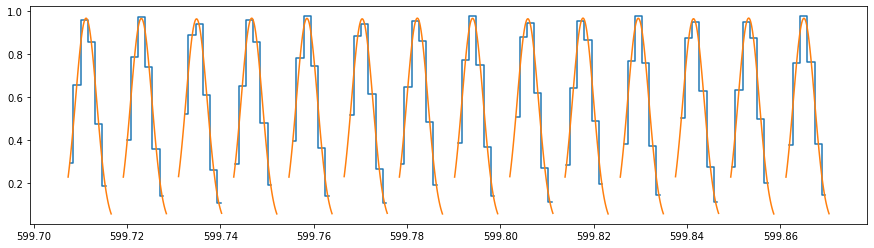

In [136]:
fit = fitting.LevMarLSQFitter()
plt.figure(figsize=(15,4))
for i,llp in enumerate(lp[1:15]):
    dl = llp/130000
    m = (cb > llp-dl) & (cb < llp+dl) #& (spcd.statistic > 0.30)
    y = spcd.statistic[m]
    x = cb[m]
    p = models.Gaussian1D(amplitude=1,mean=llp,stddev = (600/130000)/2/np.sqrt(2 * np.log(2) ))
    p1 =fit(p,x,y)
    plt.plot(x,y,ds="steps-mid",c="C0")    
    llo = np.linspace(llp-dl,llp+dl,100)
    plt.plot(llo,p1(llo),c="C1")


In [145]:
fit = fitting.LevMarLSQFitter()
lf = []
for i,llp in enumerate(lp[1:-2]):
    dl = llp/130000
    m = (cb > llp-dl) & (cb < llp+dl) & (spcd.statistic > 0.30)
    
    y = spcd.statistic[m]
    x = cb[m]
    p = models.Gaussian1D(amplitude=1,mean=llp,stddev = (600/130000)/2/np.sqrt(2 * np.log(2) ))
    p1 =fit(p,x,y,weights=y)
    #plt.plot(x,y,ds="steps-mid")
    lf.append(p1.mean.value)
lf = np.array(lf)

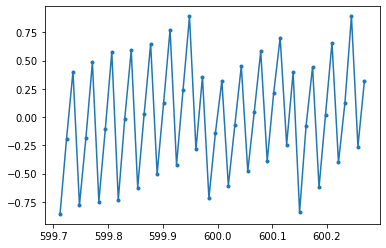

In [146]:
dlf = (lp[1:-2]-lf)
dlf = dlf-dlf.mean() 
plt.plot(lp[1:-2],dlf/lp[1:-2]*3e8,".-")

# Parasitic filters

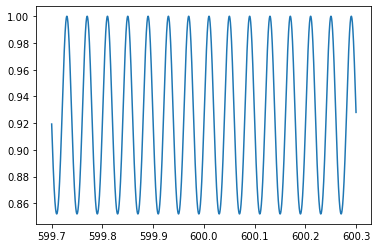

In [27]:
plt.plot(l,airy(1.5*1e6,1.5,.04,.04,l,0.05))

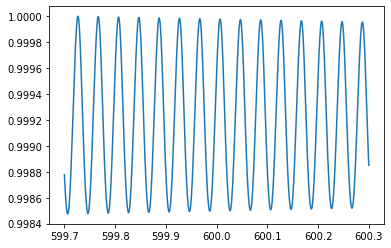

In [28]:
th = np.linspace(-0.02,0.02,100)+0.05
tr = np.zeros(10000)
for a in th:
    tr+=airy(1.5*1e6,1.5,.1,.01,l,a)
plt.plot(l,tr/tr.max())

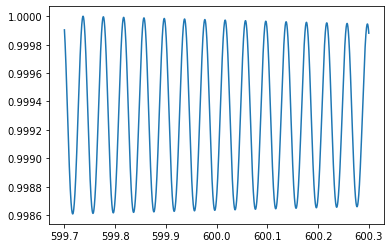

In [29]:
th = np.linspace(-0.02*.3,0.02*.3,100)+0.05
tr = np.zeros(10000)
for a in th:
    tr+=airy(1.5*1e6,1.5,.1,.01,l,a)
plt.plot(l,tr/tr.max())